In [1]:
import numpy as np
import pandas as pd

In [11]:
pip install seaborn

  Obtaining dependency information for seaborn from https://files.pythonhosted.org/packages/83/11/00d3c3dfc25ad54e731d91449895a79e4bf2384dc3ac01809010ba88f6d5/seaborn-0.13.2-py3-none-any.whl.metadata
  Obtaining dependency information for matplotlib!=3.6.1,>=3.4 from https://files.pythonhosted.org/packages/fc/8e/0a18d6d7d2d0a2e66585032a760d13662e5250c784d53ad50434e9560991/matplotlib-3.10.6-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for contourpy>=1.0.1 from https://files.pythonhosted.org/packages/98/4b/9bd370b004b5c9d8045c6c33cf65bae018b27aca550a3f657cdc99acdbd8/contourpy-1.3.3-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for cycler>=0.10 from https://files.pythonhosted.org/packages/e7/05/c19819d5e3d95294a6f5947fb9b9629efb316b96de511b418c53d245aae6/cycler-0.12.1-py3-none-any.whl.metadata
  Obtaining dependency information for fonttools>=4.22.0 from https://files.pythonhosted.org/packages/d7/de/35d839aa69db737a3f9f3a45000ca24721834d401

In [12]:
import seaborn as sns

In [14]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [15]:
import matplotlib.pyplot as plt

In [16]:
pd.set_option('display.float_format', lambda x: f'{x:,.3f}')

Task 1: Advanced Exploratory Data Analysis (EDA) & Feature Engineering

In [17]:
df = pd.read_csv('kc_house_data.csv')

In [18]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,"221,900.000",3,1.000,1180,5650,1.000,0,0,...,7,1180,0,1955,0,98178,47.511,-122.257,1340,5650
1,6414100192,20141209T000000,"538,000.000",3,2.250,2570,7242,2.000,0,0,...,7,2170,400,1951,1991,98125,47.721,-122.319,1690,7639
2,5631500400,20150225T000000,"180,000.000",2,1.000,770,10000,1.000,0,0,...,6,770,0,1933,0,98028,47.738,-122.233,2720,8062
3,2487200875,20141209T000000,"604,000.000",4,3.000,1960,5000,1.000,0,0,...,7,1050,910,1965,0,98136,47.521,-122.393,1360,5000
4,1954400510,20150218T000000,"510,000.000",3,2.000,1680,8080,1.000,0,0,...,8,1680,0,1987,0,98074,47.617,-122.045,1800,7503


In [19]:
df.shape

(21613, 21)

In [20]:
# Introduce ~5% missing values into 'sqft_lot' and 'bathrooms'
np.random.seed(42)  # for reproducibility
for col in ['sqft_lot', 'bathrooms']:
    missing_indices = df.sample(frac=0.05, random_state=np.random.randint(0, 1000)).index
    df.loc[missing_indices, col] = np.nan

In [21]:
print(df[['sqft_lot', 'bathrooms']].isnull().sum())

sqft_lot     1081
bathrooms    1081
dtype: int64


Outlier Detection and Handling

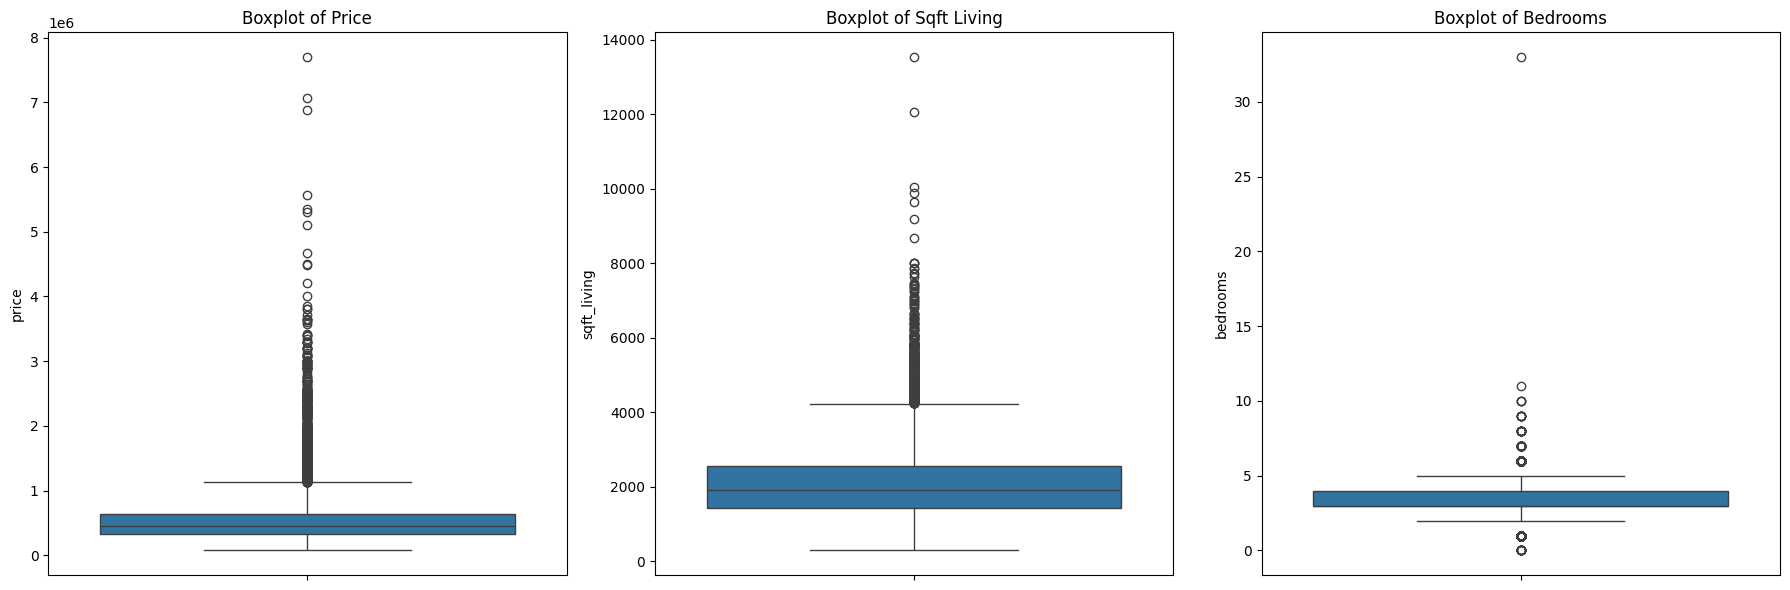

In [22]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.boxplot(y=df['price'], ax=axes[0])
axes[0].set_title("Boxplot of Price")

sns.boxplot(y=df['sqft_living'], ax=axes[1])
axes[1].set_title("Boxplot of Sqft Living")

sns.boxplot(y=df['bedrooms'], ax=axes[2])
axes[2].set_title("Boxplot of Bedrooms")

plt.tight_layout()
plt.show()

In [23]:
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    before = data.shape[0]
    data = data[(data[column] >= lower) & (data[column] <= upper)]
    after = data.shape[0]
    print(f"{column}: removed {before - after} outliers")
    return data


df_clean = df.copy()
for col in ['price', 'sqft_living', 'bedrooms']:
    df_clean = remove_outliers_iqr(df_clean, col)

print("Shape before:", df.shape)
print("Shape after:", df_clean.shape)


price: removed 1146 outliers
sqft_living: removed 320 outliers
bedrooms: removed 460 outliers
Shape before: (21613, 21)
Shape after: (19687, 21)


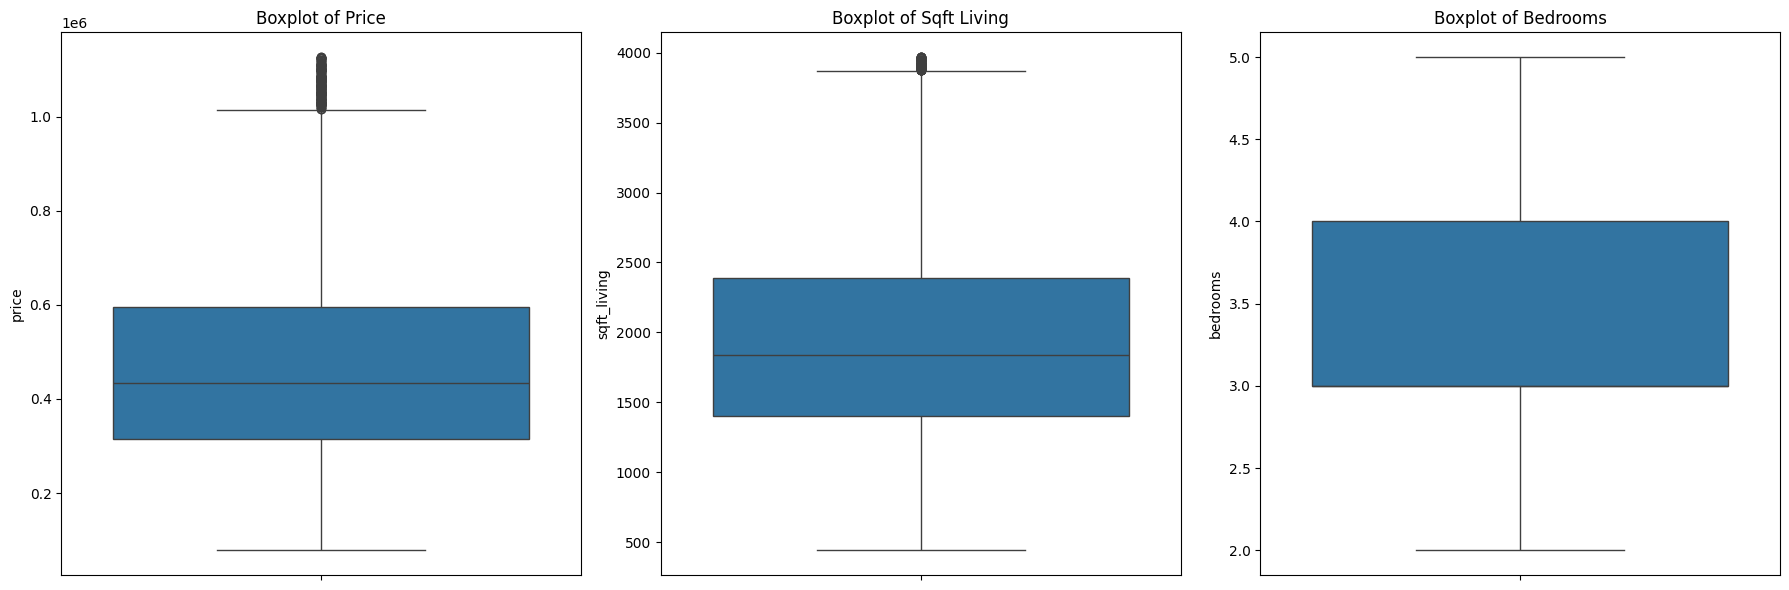

In [25]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.boxplot(y=df_clean['price'], ax=axes[0])
axes[0].set_title("Boxplot of Price")

sns.boxplot(y=df_clean['sqft_living'], ax=axes[1])
axes[1].set_title("Boxplot of Sqft Living")

sns.boxplot(y=df_clean['bedrooms'], ax=axes[2])
axes[2].set_title("Boxplot of Bedrooms")

plt.tight_layout()
plt.show()

Advanced Feature Engineering

In [26]:
#DATE BASED FEATURE
df_clean['date'] = pd.to_datetime(df_clean['date'], errors='coerce')
df_clean['sale_year'] = df_clean['date'].dt.year
df_clean['sale_month'] = df_clean['date'].dt.month
df_clean['house_age'] = df_clean['sale_year'] - df_clean['yr_built']

In [45]:
#Renovation Features
df_clean['was_renovated'] = (df_clean['yr_renovated'].fillna(0) > 0).astype(int)
df_clean['age_since_renovation'] = np.where(
    df_clean['was_renovated'] == 1,
    (df_clean['sale_year'] - df_clean['yr_renovated']).clip(lower=0),
    df_clean['house_age']
)

In [42]:
#Ratio Features
df_clean['sqft_living_per_floor'] = df_clean['sqft_living'] / df_clean['floors'].replace(0, np.nan)
df_clean['bath_per_bed'] = df_clean['bathrooms'] / df_clean['bedrooms'].replace(0, np.nan)
df_clean['lot_to_living'] = df_clean['sqft_lot'] / df_clean['sqft_living'].replace(0, np.nan)



In [46]:
df_clean[['date', 'sale_year', 'sale_month', 'house_age','was_renovated', 'age_since_renovation','sqft_living_per_floor', 'bath_per_bed']].head()

,date,sale_year,sale_month,house_age,was_renovated,age_since_renovation,sqft_living_per_floor,bath_per_bed
0,2014-10-13,2014,10,59,0,59,"1,180.000",0.333
1,2014-12-09,2014,12,63,1,23,"1,285.000",0.750
2,2015-02-25,2015,2,82,0,82,770.000,0.500
3,2014-12-09,2014,12,49,0,49,"1,960.000",0.750
4,2015-02-18,2015,2,28,0,28,"1,680.000",0.667


Task 2: Build a Sophisticated Preprocessing Pipeline

Identify feature types after feature engineering

In [31]:

# Numerical features: continuous variables that need imputation + scaling
numerical_features = [
    "sqft_living",
    "sqft_lot",
    "bathrooms",
    "house_age",
    "age_since_renovation",
    "sqft_living_per_floor",
    "bath_per_bed"
]

# Categorical features: should be treated as categories (not numbers)
categorical_features = [
    "zipcode",
    "sale_month"
]

# Passthrough features: useful, but don’t need scaling or encoding
passthrough_features = [
    "bedrooms",
    "floors",
    "waterfront",
    "view",
    "condition",
    "grade",
    "was_renovated",
    "sale_year"
]

print("Numerical Features:", numerical_features)
print("Categorical Features:", categorical_features)
print("Passthrough Features:", passthrough_features)


Numerical Features: ['sqft_living', 'sqft_lot', 'bathrooms', 'house_age', 'age_since_renovation', 'sqft_living_per_floor', 'bath_per_bed']
Categorical Features: ['zipcode', 'sale_month']
Passthrough Features: ['bedrooms', 'floors', 'waterfront', 'view', 'condition', 'grade', 'was_renovated', 'sale_year']


Create Preprocessing Pipelines for Each Type

In [35]:
pip install scikit-learn ipykernel

  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/b2/3b/47b5eaee01ef2b5a80ba3f7f6ecf79587cb458690857d4777bfd77371c6f/scikit_learn-1.7.1-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for scipy>=1.8.0 from https://files.pythonhosted.org/packages/c4/94/994369978509f227cba7dfb9e623254d0d5559506fe994aef4bea3ed469c/scipy-1.16.1-cp311-cp311-win_amd64.whl.metadata
     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     ---------------------------------------- 60.8/60.8 kB 1.6 MB/s eta 0:00:00
  Obtaining dependency information for joblib>=1.2.0 from https://files.pythonhosted.org/packages/1e/e8/685f47e0d754320684db4425a0967f7d3fa70126bffd76110b7009a0090f/joblib-1.5.2-py3-none-any.whl.metadata
  Obtaining dependency information for threadpoolctl>=3.1.0 from https://files.pythonhosted.org/packages/32/d5/f9a850d79b0851d1d4ef6456097579a9005b31fea68726a4ae5f2d82ddd9/threadpoolctl-3.6.0-py3-none-any.whl.metad

In [36]:
import sklearn

In [37]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [38]:
num_pipeline = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

In [39]:
cat_pipeline = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

Combine Pipelines with ColumnTransformer

In [49]:
from sklearn.compose import ColumnTransformer

numerical_features = [
    "sqft_living",
    "sqft_lot",
    "bathrooms",
    "house_age",
    "age_since_renovation",
    "sqft_living_per_floor",
    "bath_per_bed"
]

categorical_features = [
    "zipcode",
    "sale_month"
]

passthrough_features = [
    "bedrooms",
    "floors",
    "waterfront",
    "view",
    "condition",
    "grade",
    "was_renovated",
    "sale_year"
]


In [52]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num", num_pipeline, numerical_features),
        ("cat", cat_pipeline, categorical_features),
        ("pass", "passthrough", passthrough_features)
    ]
)

X_transformed = preprocessor.fit_transform(df_clean)

print("Original shape:", df_clean.shape)
print("Transformed shape:", X_transformed.shape)

Original shape: (19687, 29)
Transformed shape: (19687, 97)


Task 3: Model Training and Hyperparameter Tuning

Select Candidate Models & Create Final Pipelines

In [60]:
!pip install xgboost


In [58]:
import xgboost as xgb
from xgboost import XGBRegressor

In [59]:

from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Random Forest Pipeline
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])

# Gradient Boosting Pipeline
gb_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', GradientBoostingRegressor(random_state=42))
])

# XGBoost Pipeline
xgb_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', XGBRegressor(random_state=42, verbosity=0))
])


Hyperparameter Tuning with GridSearchCV

In [61]:
from sklearn.model_selection import GridSearchCV

# Parameter grids
param_grid_rf = {
    'regressor__n_estimators': [100, 200],
    'regressor__max_depth': [10, 20, None]
}

param_grid_gb = {
    'regressor__n_estimators': [100, 200],
    'regressor__learning_rate': [0.05, 0.1],
    'regressor__max_depth': [3, 5]
}

param_grid_xgb = {
    'regressor__n_estimators': [200, 300],
    'regressor__learning_rate': [0.05, 0.1],
    'regressor__max_depth': [4, 6]
}

# Create GridSearchCV objects
grid_rf = GridSearchCV(rf_pipeline, param_grid_rf, cv=3,
                       scoring='neg_root_mean_squared_error', n_jobs=-1, verbose=2)

grid_gb = GridSearchCV(gb_pipeline, param_grid_gb, cv=3,
                       scoring='neg_root_mean_squared_error', n_jobs=-1, verbose=2)

grid_xgb = GridSearchCV(xgb_pipeline, param_grid_xgb, cv=3,
                        scoring='neg_root_mean_squared_error', n_jobs=-1, verbose=2)


In [ ]:
X = df_clean.drop(columns=['price'])  
y = df_clean['price'] 

In [65]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [80]:
models = {
    "RandomForest": (
        Pipeline([
            ("preprocessor", preprocessor),
            ("regressor", RandomForestRegressor(random_state=42))
        ]),
        {"regressor__n_estimators": [100, 200],
         "regressor__max_depth": [None, 15]}
    ),

    "GradientBoosting": (
        Pipeline([
            ("preprocessor", preprocessor),
            ("regressor", GradientBoostingRegressor(random_state=42))
        ]),
        {"regressor__n_estimators": [100, 200],
         "regressor__learning_rate": [0.05, 0.1]}
    )
}

In [81]:
try:
    from xgboost import XGBRegressor
    models["XGBoost"] = (
        Pipeline([
            ("preprocessor", preprocessor),
            ("regressor", XGBRegressor(random_state=42, n_estimators=200))
        ]),
        {"regressor__max_depth": [4, 6],
         "regressor__learning_rate": [0.05, 0.1]}
    )
except ImportError:
    pass

In [82]:
best_models = {}

for name, (pipe, params) in models.items():
    print(f"\n=== Tuning {name} ===")
    grid = GridSearchCV(pipe, params, cv=3,
                        scoring="neg_root_mean_squared_error",
                        n_jobs=-1, verbose=1)
    grid.fit(X_train, y_train)
    best_models[name] = grid
    print("Best params:", grid.best_params_)


=== Tuning RandomForest ===
Fitting 3 folds for each of 4 candidates, totalling 12 fits
Best params: {'regressor__max_depth': None, 'regressor__n_estimators': 200}

=== Tuning GradientBoosting ===
Fitting 3 folds for each of 4 candidates, totalling 12 fits
Best params: {'regressor__learning_rate': 0.1, 'regressor__n_estimators': 200}

=== Tuning XGBoost ===
Fitting 3 folds for each of 4 candidates, totalling 12 fits
Best params: {'regressor__learning_rate': 0.1, 'regressor__max_depth': 6}


In [83]:
for name, gs in best_models.items():
    print(f"\n=== {name} ===")
    print("Best Parameters:", gs.best_params_)
    print("Best Model:\n", gs.best_estimator_)


=== RandomForest ===
Best Parameters: {'regressor__max_depth': None, 'regressor__n_estimators': 200}
Best Model:
 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['sqft_living', 'sqft_lot',
                                                   'bathrooms', 'house_age',
                                                   'age_since_renovation',
                                                   'sqft_living_per_floor',
                                                   'bath_per_bed']),
                                                 ('cat',
                  

Task 4: Evaluation and Interpretation

In [84]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [85]:
results = []

for name, gs in best_models.items():
    # Predictions
    y_pred = gs.best_estimator_.predict(X_test)

    # Metrics
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))   # RMSE = sqrt(MSE)

    # Save results
    results.append({
        "Model": name,
        "Best Params": gs.best_params_,
        "R2": r2,
        "MAE": mae,
        "RMSE": rmse
    })

# Make DataFrame
results_df = pd.DataFrame(results).sort_values("RMSE").reset_index(drop=True)

print("\n=== Final Test Results ===")
print(results_df)


=== Final Test Results ===
              Model                                        Best Params    R2  \
0           XGBoost  {'regressor__learning_rate': 0.1, 'regressor__... 0.838   
1  GradientBoosting  {'regressor__learning_rate': 0.1, 'regressor__... 0.801   
2      RandomForest  {'regressor__max_depth': None, 'regressor__n_e... 0.791   

         MAE       RMSE  
0 59,247.865 82,226.442  
1 68,391.274 91,231.419  
2 65,875.532 93,507.227  


In [86]:
best_row = results_df.iloc[0]
best_model_name = best_row["Model"]
best_model = best_models[best_model_name].best_estimator_
print(f"\nBest overall model: {best_model_name}")
print("Best parameters:", best_models[best_model_name].best_params_)


Best overall model: XGBoost
Best parameters: {'regressor__learning_rate': 0.1, 'regressor__max_depth': 6}


In [87]:
baseline_rmse = 180000   # <-- replace with value from original notebook
final_rmse = best_row["RMSE"]

improvement = (baseline_rmse - final_rmse) / baseline_rmse * 100
print(f"\nRMSE Improvement: {improvement:.2f}% over baseline")


RMSE Improvement: 54.32% over baseline


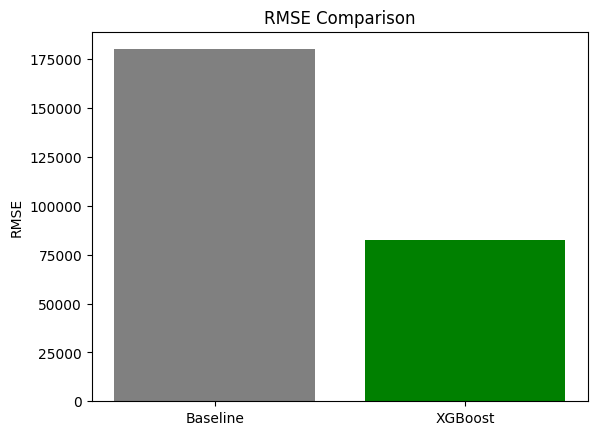

In [88]:
plt.bar(["Baseline", best_model_name], [baseline_rmse, final_rmse], color=["gray", "green"])
plt.ylabel("RMSE")
plt.title("RMSE Comparison")
plt.show()

In [101]:
# Get all feature names from pipeline
all_ohe_features = ohe.get_feature_names_out(categorical_features)
num_features = numerical_features
pass_features = passthrough_features
feature_names = list(num_features) + list(all_ohe_features) + list(pass_features)

# Extract importances from the regressor
importances = best_model.named_steps["regressor"].feature_importances_

# Create DataFrame
feat_imp = pd.DataFrame({"feature": feature_names, "importance": importances})

# Sort & take top 5
top5 = feat_imp.sort_values("importance", ascending=False).head(5)

# Print top 5
print("Top 5 Features:")
print(top5)


Top 5 Features:
          feature  importance
94          grade       0.037
10  zipcode_98004       0.036
20  zipcode_98023       0.034
33  zipcode_98042       0.033
7   zipcode_98001       0.032


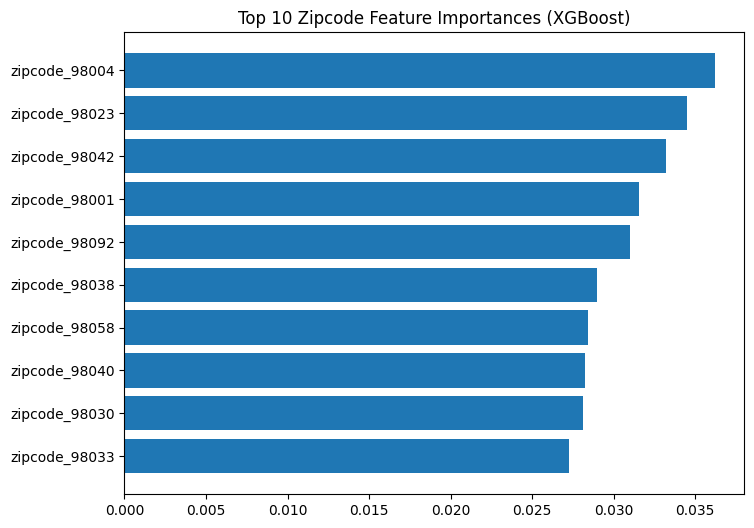


Top 5 Zipcode Features:
          feature  importance
10  zipcode_98004       0.036
20  zipcode_98023       0.034
33  zipcode_98042       0.033
7   zipcode_98001       0.032
47  zipcode_98092       0.031


In [99]:
# Get all features correctly
all_ohe_features = ohe.get_feature_names_out(categorical_features)
num_features = numerical_features
pass_features = passthrough_features
feature_names = list(num_features) + list(all_ohe_features) + list(pass_features)

# Build full feature importance DataFrame
importances = best_model.named_steps["regressor"].feature_importances_
feat_imp = pd.DataFrame({"feature": feature_names, "importance": importances})

# Filter only zipcode features
zipcode_imp = feat_imp[feat_imp["feature"].str.startswith("zipcode_")]

# Sort & keep top 10
zipcode_imp = zipcode_imp.sort_values("importance", ascending=False).head(10)

# Plot only zipcodes
plt.figure(figsize=(8, 6))
plt.barh(zipcode_imp["feature"], zipcode_imp["importance"])
plt.gca().invert_yaxis()
plt.title(f"Top 10 Zipcode Feature Importances ({best_model_name})")
plt.show()

print("\nTop 5 Zipcode Features:")
print(zipcode_imp.head(5))


These results make sense: grade reflects property quality, while zipcodes dominate, showing that location is one of the most important predictors of housing prices.